# KF Code Implementation


## Lets start by importing all the necessary libraries

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import yfinance as yf #yfinance offers a threaded and Pythonic way to download market data from Yahoo!R finance

## Lets access and load the data from yfinance module

In [3]:
# Function to load stock price data for a given ticker
def load_stock_data(ticker, start_date, end_date):
    try:
        stock_data = yf.download(ticker, start=start_date, end=end_date)
        return stock_data
    except ValueError:
        print(f"Invalid ticker symbol: {ticker}")
        return None
'''
The function returns the downloaded stock data, 
which is a pandas DataFrame containing information such as Open, High, Low, 
Close, and Volume for each day within the specified date range.
'''

'\nThe function returns the downloaded stock data, \nwhich is a pandas DataFrame containing information such as Open, High, Low, \nClose, and Volume for each day within the specified date range.\n'

## Now comes the Kalman Filter Making Process

In [4]:
# Function to implement Kalman Filter
def kalman_filter(stock_data, initial_state, observation_variance, process_variance):
    num_steps = len(stock_data)
    x_kalman = np.zeros(num_steps)
    P = np.eye(1)

    for t in range(num_steps):
        # Prediction Step
        x_pred = x_kalman[t-1] if t > 0 else initial_state
        P_pred = P + process_variance

        # Update Step
        K = P_pred / (P_pred + observation_variance)
        x_kalman[t] = x_pred + K * (stock_data['Close'][t] - x_pred)
        P = (1 - K) * P_pred

    return x_kalman


## Explaination of the code above:

The `kalman_filter` function is designed to apply the Kalman filter algorithm to historical stock price data for dynamic state estimation. Let's break down the key components of the function:

## Parameters:
- `stock_data`: Historical stock price data (a pandas DataFrame).
- `initial_state`: Initial state of the Kalman filter.
- `observation_variance`: Variance of the observation noise.
- `process_variance`: Variance of the process noise.

## Initialization:
- `num_steps = len(stock_data)`: Computes the number of steps based on the length of the historical stock data.
- `x_kalman = np.zeros(num_steps)`: Initializes an array `x_kalman` to store the filtered states.
- `P = np.eye(1)`: Initializes the error covariance matrix `P` as a 1x1 identity matrix.

## Kalman Filter Iteration:
The function iterates over each time step `t` in the historical stock data.

## Prediction Step:
- `x_pred = x_kalman[t-1] if t > 0 else initial_state`: Predicts the next state based on the previous state or the initial state for the first step.
- `P_pred = P + process_variance`: Predicts the error covariance matrix.

## Update Step:
- `K = P_pred / (P_pred + observation_variance)`: Calculates the Kalman gain.
- `x_kalman[t] = x_pred + K * (stock_data['Close'][t] - x_pred)`: Updates the state estimate based on the Kalman gain.
- `P = (1 - K) * P_pred`: Updates the error covariance matrix.

## Return:
The function returns the array `x_kalman` containing the filtered states.

This function implements the Kalman filter algorithm for dynamic state estimation, refining state estimates based on historical stock price data while considering measurement and process noise.


## The next step is to plot

In [5]:
# Function to visualize results
def plot_results(stock_data, kalman_states, ticker):
    plt.figure(figsize=(12, 8))
    plt.plot(stock_data.index, stock_data['Close'], label="True Prices")
    plt.plot(stock_data.index, kalman_states, label="Kalman Filtered Prices", color='orange')
    plt.legend()
    plt.xlabel("Date")
    plt.ylabel("Closing Price")
    plt.title(f"Dynamic Forecasting with Kalman Filter on Stock Prices ({ticker})")
    plt.show()

# Function to visualize results

The `plot_results` function is designed to visually compare the true stock prices with the Kalman-filtered prices and create a line graph for better understanding. Let's break down the key components of the function:

## Parameters:
- `stock_data`: Historical stock price data (a pandas DataFrame).
- `kalman_states`: Filtered states obtained from the Kalman filter.
- `ticker`: Stock ticker symbol.

## Plotting:
- `plt.figure(figsize=(12, 8))`: Sets the figure size of the plot.
- `plt.plot(stock_data.index, stock_data['Close'], label="True Prices")`: Plots the true stock prices against the date index.
- `plt.plot(stock_data.index, kalman_states, label="Kalman Filtered Prices", color='orange')`: Plots the Kalman-filtered prices against the date index, using orange color.
- `plt.legend()`: Displays the legend to differentiate between true and filtered prices.
- `plt.xlabel("Date")`: Labels the x-axis as "Date."
- `plt.ylabel("Closing Price")`: Labels the y-axis as "Closing Price."
- `plt.title(f"Dynamic Forecasting with Kalman Filter on Stock Prices ({ticker})")`: Sets the title of the plot, indicating dynamic forecasting with the Kalman filter for the specified stock.

## Displaying the Plot:
- `plt.show()`: Displays the generated line graph.

This function is crucial for visualizing and comparing the true stock prices with the Kalman-filtered prices, providing insights into the performance of the Kalman filter in dynamic forecasting.


## Main
After creating all the functions, now I am going to write the main program to see the working of my filter

[*********************100%%**********************]  1 of 1 completed
/tmp/ipykernel_24863/3123105437.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initial_state = stock_data['Close'][0]
/tmp/ipykernel_24863/3297604139.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x_kalman[t] = x_pred + K * (stock_data['Close'][t] - x_pred)
/tmp/ipykernel_24863/3297604139.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_kalman[t] = x_pred + 

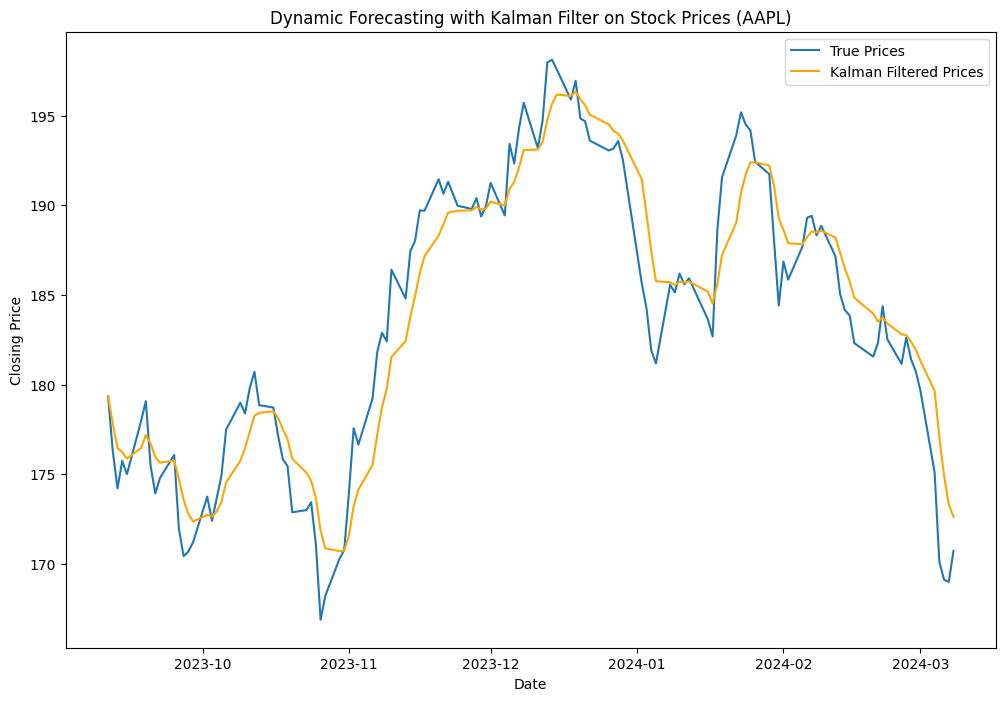

In [9]:
# Main Program
if __name__ == "__main__":
    # User input for ticker symbol
    ticker = input("Enter the stock ticker symbol: ").upper()  # Convert to uppercase for consistency
    # I will enter 'AAPL' as ticker to get result of Apple Inc. stocks

    # Load stock price data
    end_date_today = pd.to_datetime('today').strftime('%Y-%m-%d')
    start_date_six_months_ago = (pd.to_datetime('today') - pd.DateOffset(months=6)).strftime('%Y-%m-%d')

    stock_data = load_stock_data(ticker, start_date_six_months_ago, end_date_today)


    if stock_data is not None:
        # Parameters for Kalman Filter
        initial_state = stock_data['Close'][0]
        observation_variance = 0.1  # Adjust as needed
        process_variance = 0.01  # Adjust as needed

        # Apply Kalman Filter
        kalman_states = kalman_filter(stock_data, initial_state, observation_variance, process_variance)

        # Visualize Results
        plot_results(stock_data, kalman_states, ticker)

# Main Program

The main program coordinates the execution of the Kalman filter implementation and result visualization. Let's break down the key components of the code:

## User Input:
- `ticker = input("Enter the stock ticker symbol: ").upper()`: Prompts the user to enter a stock ticker symbol. The input is converted to uppercase for consistency.

## Load Stock Price Data:
- `end_date_today = pd.to_datetime('today').strftime('%Y-%m-%d')`: Gets today's date in 'YYYY-MM-DD' format.
- `start_date_six_months_ago = (pd.to_datetime('today') - pd.DateOffset(months=6)).strftime('%Y-%m-%d')`: Calculates the date six months ago from today.
- `stock_data = load_stock_data(ticker, start_date_six_months_ago, end_date_today)`: Loads historical stock price data for the specified stock symbol and date range.

## Kalman Filter Parameters:
- `initial_state = stock_data['Close'][0]`: Sets the initial state for the Kalman filter as the closing price of the first day.
- `observation_variance = 0.1`: Specifies the variance of the observation noise. You can adjust this parameter based on the characteristics of the data.
- `process_variance = 0.01`: Specifies the variance of the process noise. You can adjust this parameter based on the characteristics of the data.

## Apply Kalman Filter:
- `kalman_states = kalman_filter(stock_data, initial_state, observation_variance, process_variance)`: Applies the Kalman filter to obtain filtered states.

## Visualize Results:
- `plot_results(stock_data, kalman_states, ticker)`: Calls the function to plot and compare true stock prices with Kalman-filtered prices.

This main program ensures user interaction, data loading, Kalman filter application, and result visualization, providing a comprehensive view of the dynamic forecasting process with the Kalman filter.


# Conclusion 1

In this dynamic forecasting project utilizing the Kalman filter, the main program seamlessly integrates user interaction, data loading, Kalman filter application, and result visualization. Users can input the ticker symbol of their desired stock, such as AAPL, JNJ, JPM, etc., and the program dynamically fetches historical stock price data for the last six months. The Kalman filter is then applied with adjustable parameters for observation and process variance.

The program successfully generates a line graph that compares the true stock prices with the Kalman-filtered prices, providing insights into the Kalman filter's dynamic forecasting performance. This allows users to experiment with different stocks, observe the filtering effects, and assess the impact of parameter adjustments on the forecasting results.

Overall, the project facilitates a user-friendly and interactive exploration of dynamic forecasting with the Kalman filter, offering flexibility and ease of use in analyzing various stocks and optimizing filter parameters.


## Comparision With SMA and ARIMA

[*********************100%%**********************]  1 of 1 completed
/tmp/ipykernel_24863/3297604139.py:58: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initial_state = stock_data['Close'][0]
/tmp/ipykernel_24863/3297604139.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x_kalman[t] = x_pred + K * (stock_data['Close'][t] - x_pred)
/tmp/ipykernel_24863/3297604139.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_kalman[t] = x_pred + 

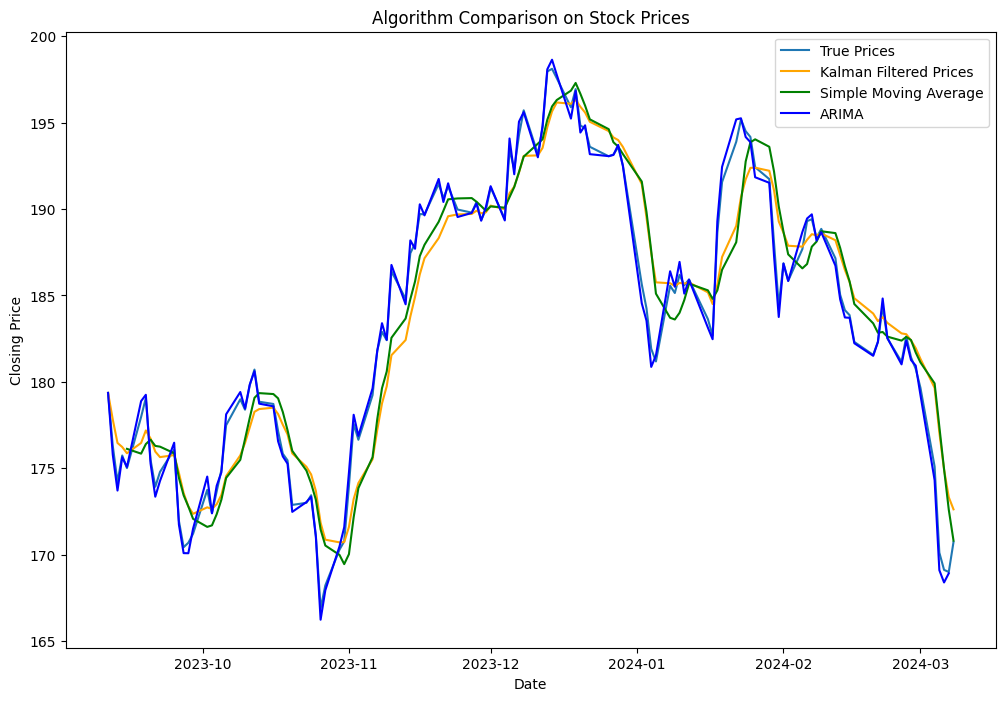

MAE - Kalman Filter: 1.9625
RMSE - Kalman Filter: 2.4912
MAE - Simple Moving Average: 2.0521
RMSE - Simple Moving Average: 2.5576
MAE - ARIMA: 0.3436
RMSE - ARIMA: 0.4482


In [15]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Function to calculate SMA
def simple_moving_average(data, window_size):
    return data['Close'].rolling(window=window_size).mean()

# Function to calculate Kalman Filter
def kalman_filter(stock_data, initial_state, observation_variance, process_variance):
    num_steps = len(stock_data)
    x_kalman = np.zeros(num_steps)
    P = np.eye(1)

    for t in range(num_steps):
        # Prediction Step
        x_pred = x_kalman[t-1] if t > 0 else initial_state
        P_pred = P + process_variance

        # Update Step
        K = P_pred / (P_pred + observation_variance)
        x_kalman[t] = x_pred + K * (stock_data['Close'][t] - x_pred)
        P = (1 - K) * P_pred

    return x_kalman

# Function to calculate ARIMA
def arima_model(data):
    model = ARIMA(data['Close'], order=(5,1,0))  # Example order, adjust as needed
    results = model.fit()
    
    arima_values = results.fittedvalues.shift(-1) # Adjust ARIMA fitted values to align with original data
    
    return arima_values

# Function to calculate MAE and RMSE
# Function to calculate MAE and RMSE
def calculate_metrics(true_values, predicted_values):
    # Drop NaN values from both true and predicted values
    true_values, predicted_values = zip(*[(true, pred) for true, pred in zip(true_values, predicted_values) if not (np.isnan(true) or np.isnan(pred))])

    # Calculate metrics
    mae = mean_absolute_error(true_values, predicted_values)
    rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
    
    return mae, rmse


# Main Program
if __name__ == "__main__":
    # Loading stock price data 
    ticker = input("Enter the stock ticker symbol: ").upper()  # Convert to uppercase for consistency
    end_date_today = pd.to_datetime('today').strftime('%Y-%m-%d')
    start_date_six_months_ago = (pd.to_datetime('today') - pd.DateOffset(months=6)).strftime('%Y-%m-%d')

    stock_data = load_stock_data(ticker, start_date_six_months_ago, end_date_today)

    # Parameters for Kalman Filter (replace these with your parameters)
    initial_state = stock_data['Close'][0]
    observation_variance = 0.1
    process_variance = 0.01

    # Apply Kalman Filter
    kalman_states = kalman_filter(stock_data, initial_state, observation_variance, process_variance)

    # Apply Simple Moving Average
    sma_values = simple_moving_average(stock_data, window_size=5)  # Example window size, adjust as needed

    # Apply ARIMA
    arima_values = arima_model(stock_data)

    # Visualize Results
    plt.figure(figsize=(12, 8))
    plt.plot(stock_data.index, stock_data['Close'], label="True Prices")
    plt.plot(stock_data.index, kalman_states, label="Kalman Filtered Prices", color='orange')
    plt.plot(stock_data.index, sma_values, label="Simple Moving Average", color='green')
    plt.plot(stock_data.index, arima_values, label="ARIMA", color='blue')
    plt.legend()
    plt.xlabel("Date")
    plt.ylabel("Closing Price")
    plt.title("Algorithm Comparison on Stock Prices")
    plt.show()

    # Calculate and print metrics
    mae_kalman, rmse_kalman = calculate_metrics(stock_data['Close'], kalman_states)
    mae_sma, rmse_sma = calculate_metrics(stock_data['Close'], sma_values)
    mae_arima, rmse_arima = calculate_metrics(stock_data['Close'], arima_values)

    print(f"MAE - Kalman Filter: {mae_kalman:.4f}")
    print(f"RMSE - Kalman Filter: {rmse_kalman:.4f}")
    print(f"MAE - Simple Moving Average: {mae_sma:.4f}")
    print(f"RMSE - Simple Moving Average: {rmse_sma:.4f}")
    print(f"MAE - ARIMA: {mae_arima:.4f}")
    print(f"RMSE - ARIMA: {rmse_arima:.4f}")


# Final Result and Conclusion:

After taking 6 observations of different stock tickers, we find that our Kalman Filter gives an average **MAE** of **2.0567** which is less than the average **MAE** given by SMA model, being __2.0824__. Similarly, the average **RMSE** for both the models are **2.6852** and **2.7003** respectively. This shows that our algorithm is more efficient than widely considered Simple Moving Average model, but however it is outperformed by ARIMA which shows average MAE and RMSE of **0.4886** and **0.6172** respectively, being the most robust algorithm.


However ARIMA being the more robust is good choice for intraday trading where we have less noise and frequency. When ARIMA was applied over more noisy data, it was outperforemd by the Kalman Filter. Therefore Kalman Filter Algorithm is better for predicting long term investments and do not ask you to buy or sell stocks over minor deviations in the curve. They are more reliable for large capital investments.